# Number of points per year

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import DataSetQuery
import datetime
import json
import MalardHelpers
import geopandas as gp
import numpy as np
from shapely.geometry import Point, Polygon
from pandas.io.json import json_normalize


In [12]:
environmentName = 'DEV'
parentDsName = 'mtngla'
dataSet = 'ReadyData4'
runName='TestRun4-Serial'
region = 'HMA'

#Sets the URL of the Malard ServiceGateway.
query = DataSetQuery.DataSetQuery('http://localhost:9000',environmentName)

bbx = query.getDataSetBoundingBox( parentDsName, dataSet)
bbx = json.loads(bbx)
minX=bbx['gridCellMinX']
maxX=bbx['gridCellMaxX']
minY=bbx['gridCellMinY']
maxY=bbx['gridCellMaxY']
minT = datetime.datetime.utcfromtimestamp(bbx['minTime']/1000) # divide by 1000 because it is in milliseconds
maxT = datetime.datetime.utcfromtimestamp(bbx['maxTime']/1000+10000)


In [13]:
stats=query.getRunStatistics(parentDsName, runName)
stats = json.loads(stats)
dfStats = json_normalize(stats)
print('Columns: ',dfStats.columns)

#create new stats: area and point ratio
dfStats['statistics.points_per_sqkm']=dfStats['statistics.result_total']/dfStats['statistics.glacierMaskArea']

#convert to geodataframe
crs = json.loads(query.getProjection(region))['proj4']

#geometry = [Point(xy) for xy in zip(dfStats['gridCell.minX'], dfStats['gridCell.minY'])]
geometry = []
for idx, line in dfStats.iterrows():
    minX,maxX=line['gridCell.minX'],line['gridCell.minX']+line['gridCell.size']
    minY,maxY=line['gridCell.minY'],line['gridCell.minY']+line['gridCell.size']
    geometry.append(Polygon([(minX,minY), (minX,maxY), (maxX,maxY), (maxX,minY), (minX,minY)]))
geoStats = gp.GeoDataFrame(dfStats, crs=crs, geometry=geometry)
#geoStats=geoStats.dropna()


Columns:  Index(['gridCell.minX', 'gridCell.minY', 'gridCell.size',
       'statistics.afterDebrisMask', 'statistics.afterGlacierMask',
       'statistics.debrisMaskArea', 'statistics.glacierMaskArea',
       'statistics.joined_data', 'statistics.result_avgX',
       'statistics.result_avgY', 'statistics.result_count_2010',
       'statistics.result_count_2011', 'statistics.result_count_2012',
       'statistics.result_count_2013', 'statistics.result_count_2014',
       'statistics.result_count_2015', 'statistics.result_count_2016',
       'statistics.result_count_2017', 'statistics.result_count_2018',
       'statistics.result_offsetX', 'statistics.result_offsetY',
       'statistics.result_srtm', 'statistics.result_tandemx',
       'statistics.result_total', 'statistics.srtm_filtered',
       'statistics.srtm_not_in', 'statistics.tandemX_filtered'],
      dtype='object')


# Total points per year per grid cell

<IPython.core.display.Javascript object>


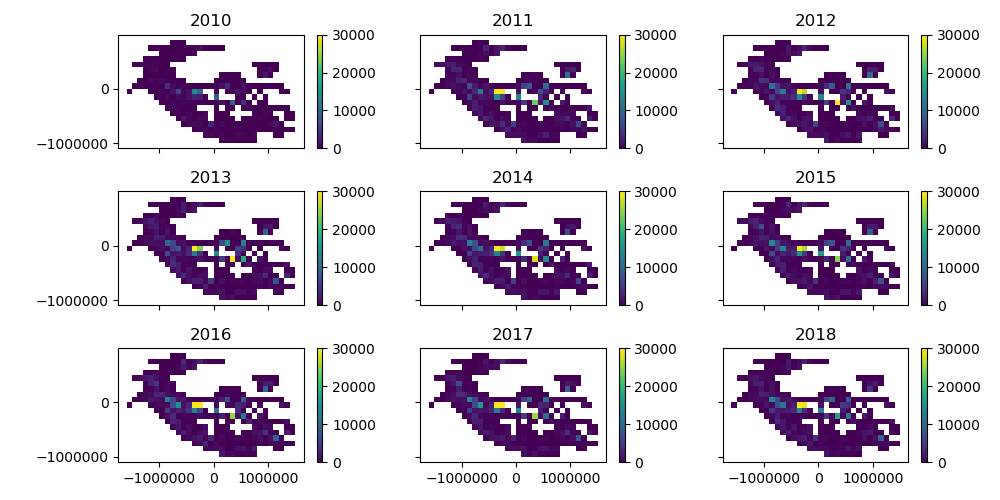

In [14]:
# Total points per year per grid cell
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 5), sharex=True, sharey=True, tight_layout=True)

geoStats.plot(ax= axs[0][0], column='statistics.result_count_2010', markersize=5, legend=True, vmax=30000)
geoStats.plot(ax= axs[0][1], column='statistics.result_count_2011', markersize=5, legend=True, vmax=30000)
geoStats.plot(ax= axs[0][2], column='statistics.result_count_2012', markersize=5, legend=True, vmax=30000)
geoStats.plot(ax= axs[1][0], column='statistics.result_count_2013', markersize=5, legend=True, vmax=30000)
geoStats.plot(ax= axs[1][1], column='statistics.result_count_2014', markersize=5, legend=True, vmax=30000)
geoStats.plot(ax= axs[1][2], column='statistics.result_count_2015', markersize=5, legend=True, vmax=30000)
geoStats.plot(ax= axs[2][0], column='statistics.result_count_2016', markersize=5, legend=True, vmax=30000)
geoStats.plot(ax= axs[2][1], column='statistics.result_count_2017', markersize=5, legend=True, vmax=30000)
geoStats.plot(ax= axs[2][2], column='statistics.result_count_2018', markersize=5, legend=True, vmax=30000)

axs[0][0].set_title('2010')
axs[0][1].set_title('2011')
axs[0][2].set_title('2012')
axs[1][0].set_title('2013')
axs[1][1].set_title('2014')
axs[1][2].set_title('2015')
axs[2][0].set_title('2016')
axs[2][1].set_title('2017')
axs[2][2].set_title('2018')

plt.show()


In [129]:
#fig, axs = plt.subplots(ncols=2, figsize=(9, 4), sharex=True, sharey=True, tight_layout=True)
#ax0, ax1 = axs.flatten()

# Distribution of number of points per gridcell per year

<IPython.core.display.Javascript object>


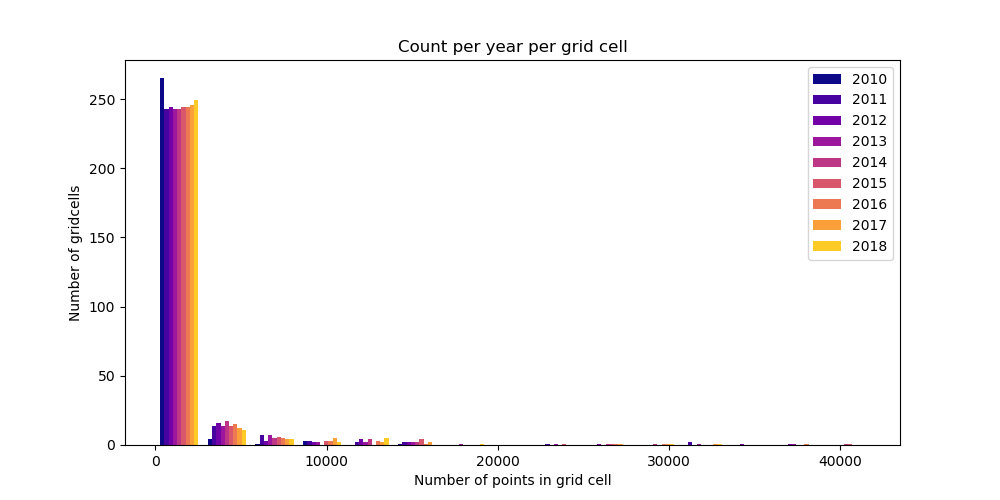

In [5]:
%matplotlib notebook

#HISTOGRAM COUNT POINTS PER GRIDCELL PER YEAR
plt.figure(figsize=(10,5))
plt.title('Count per year per grid cell')
plt.ylabel('Number of gridcells')
plt.xlabel('Number of points in grid cell')
bins = 15
NUM_COLORS = 9
cm = plt.get_cmap('plasma')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

ax=plt.hist([geoStats['statistics.result_count_2010'], geoStats['statistics.result_count_2011'], \
          + geoStats['statistics.result_count_2012'], geoStats['statistics.result_count_2013'], \
          + geoStats['statistics.result_count_2014'], geoStats['statistics.result_count_2015'], \
          + geoStats['statistics.result_count_2016'], geoStats['statistics.result_count_2017'], \
          + geoStats['statistics.result_count_2018']], \
         + bins, label=['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], color=colors)


plt.legend(loc='upper right')
plt.show()

# Total number of points per year

<IPython.core.display.Javascript object>


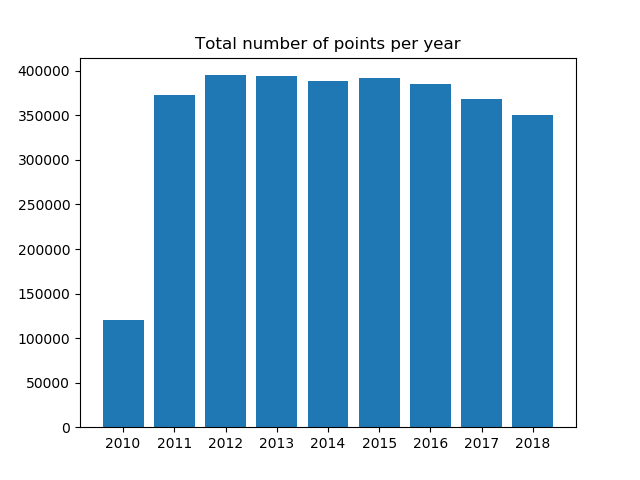

<BarContainer object of 9 artists>

In [6]:
%matplotlib notebook
# number of points per year (sum of all the gridcells)
x = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
y = [geoStats['statistics.result_count_2010'].sum(), geoStats['statistics.result_count_2011'].sum(), \
          + geoStats['statistics.result_count_2012'].sum(), geoStats['statistics.result_count_2013'].sum(), \
          + geoStats['statistics.result_count_2014'].sum(), geoStats['statistics.result_count_2015'].sum(), \
          + geoStats['statistics.result_count_2016'].sum(), geoStats['statistics.result_count_2017'].sum(), \
          + geoStats['statistics.result_count_2018'].sum()]
plt.title('Total number of points per year')
plt.bar(x, y)

<IPython.core.display.Javascript object>


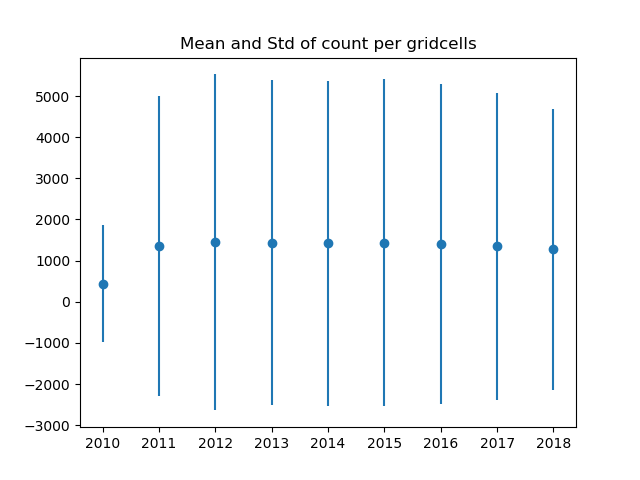

<ErrorbarContainer object of 3 artists>

In [7]:
%matplotlib notebook
x = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
y = [geoStats['statistics.result_count_2010'].mean(), geoStats['statistics.result_count_2011'].mean(), \
          + geoStats['statistics.result_count_2012'].mean(), geoStats['statistics.result_count_2013'].mean(), \
          + geoStats['statistics.result_count_2014'].mean(), geoStats['statistics.result_count_2015'].mean(), \
          + geoStats['statistics.result_count_2016'].mean(), geoStats['statistics.result_count_2017'].mean(), \
          + geoStats['statistics.result_count_2018'].mean()]
error = [geoStats['statistics.result_count_2010'].std(), geoStats['statistics.result_count_2011'].std(), \
          + geoStats['statistics.result_count_2012'].std(), geoStats['statistics.result_count_2013'].std(), \
          + geoStats['statistics.result_count_2014'].std(), geoStats['statistics.result_count_2015'].std(), \
          + geoStats['statistics.result_count_2016'].std(), geoStats['statistics.result_count_2017'].std(), \
          + geoStats['statistics.result_count_2018'].std()]
plt.title("Mean and Std of count per gridcells")
plt.errorbar(x, y, error, linestyle='None', fmt='-o')

# Average change between number of points per gridcell from year to year

<IPython.core.display.Javascript object>


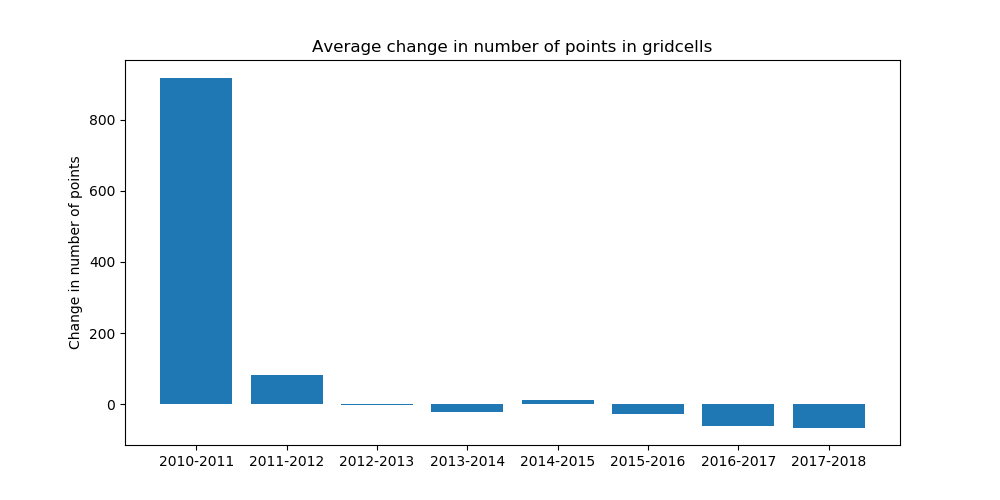

<BarContainer object of 8 artists>

In [8]:
%matplotlib notebook
# Average change between number of points per gridcell from year to year
changesX = ['2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018']


changes = []
changes.append(geoStats['statistics.result_count_2011'] - geoStats['statistics.result_count_2010'])
changes.append(geoStats['statistics.result_count_2012'] - geoStats['statistics.result_count_2011'])
changes.append(geoStats['statistics.result_count_2013'] - geoStats['statistics.result_count_2012'])
changes.append(geoStats['statistics.result_count_2014'] - geoStats['statistics.result_count_2013'])
changes.append(geoStats['statistics.result_count_2015'] - geoStats['statistics.result_count_2014'])
changes.append(geoStats['statistics.result_count_2016'] - geoStats['statistics.result_count_2015'])
changes.append(geoStats['statistics.result_count_2017'] - geoStats['statistics.result_count_2016'])
changes.append(geoStats['statistics.result_count_2018'] - geoStats['statistics.result_count_2017'])

means = [change.mean() for change in changes]

plt.figure(figsize=(10,5))
plt.title('Average change in number of points in gridcells')
plt.ylabel('Change in number of points')
plt.bar(changesX, means)

In [10]:
# Add changes to dataframe
geoStats['statistics.change_2010_2011'] = changes[0]
geoStats['statistics.change_2011_2012'] = changes[1]
geoStats['statistics.change_2012_2013'] = changes[2]
geoStats['statistics.change_2013_2014'] = changes[3]
geoStats['statistics.change_2014_2015'] = changes[4]
geoStats['statistics.change_2015_2016'] = changes[5]
geoStats['statistics.change_2016_2017'] = changes[6]
geoStats['statistics.change_2017_2018'] = changes[7]


# Change in number of points from year to year

<IPython.core.display.Javascript object>


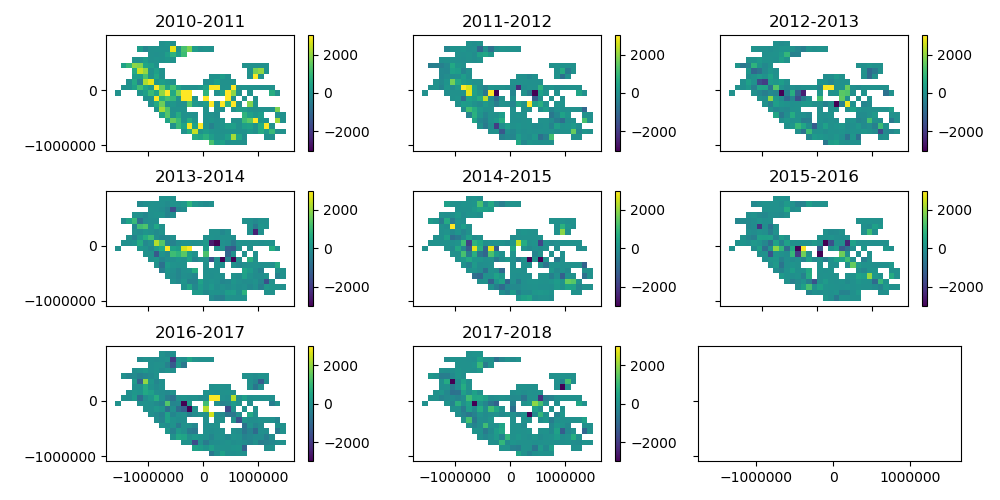

In [11]:
# Change in number of points from year to year
vmin = -3000
vmax = 3000

# Total points per year per grid cell
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 5), sharex=True, sharey=True, tight_layout=True)

geoStats.plot(ax= axs[0][0], column='statistics.change_2010_2011', markersize=5, legend=True, vmin=vmin, vmax=vmax)
geoStats.plot(ax= axs[0][1], column='statistics.change_2011_2012', markersize=5, legend=True, vmin=vmin, vmax=vmax)
geoStats.plot(ax= axs[0][2], column='statistics.change_2012_2013', markersize=5, legend=True, vmin=vmin, vmax=vmax)
geoStats.plot(ax= axs[1][0], column='statistics.change_2013_2014', markersize=5, legend=True, vmin=vmin, vmax=vmax)
geoStats.plot(ax= axs[1][1], column='statistics.change_2014_2015', markersize=5, legend=True, vmin=vmin, vmax=vmax)
geoStats.plot(ax= axs[1][2], column='statistics.change_2015_2016', markersize=5, legend=True, vmin=vmin, vmax=vmax)
geoStats.plot(ax= axs[2][0], column='statistics.change_2016_2017', markersize=5, legend=True, vmin=vmin, vmax=vmax)
geoStats.plot(ax= axs[2][1], column='statistics.change_2017_2018', markersize=5, legend=True, vmin=vmin, vmax=vmax)

#geoStats.plot(ax= axs[1], column='statistics.points_per_sqkm', markersize=5, legend=True)
axs[0][0].set_title(changesX[0])
axs[0][1].set_title(changesX[1])
axs[0][2].set_title(changesX[2])
axs[1][0].set_title(changesX[3])
axs[1][1].set_title(changesX[4])
axs[1][2].set_title(changesX[5])
axs[2][0].set_title(changesX[6])
axs[2][1].set_title(changesX[7])

plt.show()


In [16]:
geoStats.mean()

gridCell.minX                  -5.802920e+04
gridCell.minY                  -1.872263e+05
gridCell.size                   1.000000e+05
statistics.afterDebrisMask      1.159938e+04
statistics.afterGlacierMask     1.212720e+04
statistics.debrisMaskArea       3.724002e+01
statistics.glacierMaskArea      3.446976e+02
statistics.joined_data          1.131396e+06
statistics.result_avgX         -8.583290e+03
statistics.result_avgY         -1.360994e+05
statistics.result_count_2010    4.408759e+02
statistics.result_count_2011    1.359730e+03
statistics.result_count_2012    1.442109e+03
statistics.result_count_2013    1.439544e+03
statistics.result_count_2014    1.418453e+03
statistics.result_count_2015    1.431088e+03
statistics.result_count_2016    1.405011e+03
statistics.result_count_2017    1.342858e+03
statistics.result_count_2018    1.277412e+03
statistics.result_offsetX      -5.540926e+02
statistics.result_offsetY       1.126921e+03
statistics.result_srtm          9.635493e+03
statistics